In [3]:
import pandas as pd
import numpy as np

In [91]:
#Q1
sf_housing_raw=pd.read_csv("C:\\Users\skhadka3\\OneDrive - University of Vermont\\Documents\\Data Science-I\\Assignment\\HW 3\\sf_housing\\sfhousing_raw.csv")
sf_housing_raw

ParserError: Error tokenizing data. C error: Expected 11 fields in line 30550, saw 12


In [137]:
sf_business_corrected=pd.read_csv("C:\\Users\\skhadka3\\OneDrive - University of Vermont\Documents\\Data Science-I\\Assignment\\HW 3\\sf_housing\\sfhousing_corrected.csv")
sf_business_corrected


,county,city,zip,street,price,br,lsqft,bsqft,year,date,datesold
0,Alameda County,Alameda,94501.0,1001 Post Street,689000.0,4.0,4484.0,1982.0,1950.0,2004-08-29,NaN
1,Alameda County,Alameda,94501.0,1001 Santa Clara Avenue,880000.0,7.0,5914.0,3866.0,1995.0,2005-11-06,NaN
2,Alameda County,Alameda,94501.0,1001 Shoreline Drive \#102,393000.0,2.0,39353.0,1360.0,1970.0,2003-09-21,NaN
3,Alameda County,Alameda,94501.0,1001 Shoreline Drive \#108,485000.0,2.0,39353.0,1360.0,1970.0,2004-09-05,NaN
4,Alameda County,Alameda,94501.0,1001 Shoreline Drive \#201,570000.0,2.0,39353.0,1360.0,1970.0,2005-07-31,NaN
...,...,...,...,...,...,...,...,...,...,...,...
521488,Sonoma County,Windsor,95492.0,9991 Blasi Drive,389500.0,NaN,2665.0,NaN,NaN,2008-02-17,NaN
521489,Sonoma County,Windsor,95492.0,9992 Wallace Way,437000.0,3.0,6180.0,1158.0,1993.0,2005-05-15,NaN
521490,Sonoma County,Windsor,95492.0,9998 Blasi Drive,392500.0,NaN,3111.0,NaN,NaN,2008-02-17,NaN
521491,Sonoma County,Windsor,95492.0,9999 Blasi Drive,414000.0,NaN,2915.0,NaN,NaN,2008-02-17,NaN


In [156]:
#Q.3 Find the number of records corresponding to the same street address and the same price, but corresponding to different dates. Count all duplicates, i.e., if rows A, C, and E refer to the same house and the same price, answer 3. 
sf_business_duplicates = sf_business_corrected[sf_business_corrected.duplicated(subset=['street', 'price'], keep=False)]
num_duplicates=len(sf_business_duplicates)
num_duplicates

37786

In [141]:
sf_housings=pd.read_csv("C:\\Users\\skhadka3\\OneDrive - University of Vermont\\Documents\\Data Science-I\\Assignment\\HW 3\\sf_housing\\sf_housing_filtered.csv")
sf_housings


,county,city,zip,street,price,br,lsqft,bsqft,year,date,datesold
0,Alameda County,Alameda,94501.0,1001 Post Street,689000.0,4.0,4484.0,1982.0,1950.0,2004-08-29,NaN
1,Alameda County,Alameda,94501.0,1001 Shoreline Drive \#108,485000.0,2.0,39353.0,1360.0,1970.0,2004-09-05,NaN
2,Alameda County,Alameda,94501.0,1001 Shoreline Drive \#306,390000.0,2.0,39353.0,1360.0,1970.0,2004-01-25,NaN
3,Alameda County,Alameda,94501.0,100 Santa Clara Avenue,540000.0,3.0,4700.0,1029.0,1945.0,2004-09-12,NaN
4,Alameda County,Alameda,94501.0,1010 San Antonio Avenue,542000.0,2.0,4050.0,1504.0,1930.0,2004-01-11,NaN
...,...,...,...,...,...,...,...,...,...,...,...
121443,Sonoma County,Windsor,95492.0,9940 Marcella Lane,427500.0,5.0,6098.0,1555.0,NaN,2004-04-25,NaN
121444,Sonoma County,Windsor,95492.0,9958 Troon Court,1100000.0,4.0,20909.0,3475.0,1998.0,2004-08-29,NaN
121445,Sonoma County,Windsor,95492.0,9960 Herb Road,439000.0,3.0,9583.0,1626.0,1963.0,2004-04-04,NaN
121446,Sonoma County,Windsor,95492.0,9964 Troon Court,1200000.0,3.0,20038.0,4281.0,1994.0,2004-10-31,NaN


In [6]:
import matplotlib.pyplot as plt
import matplotlib as mlb
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from matplotlib import ticker
import seaborn as sns
import itertools

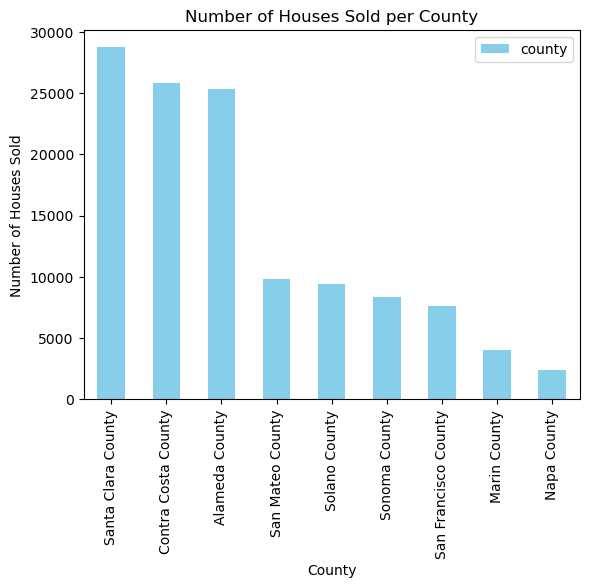

In [143]:
#Q.5. How many houses were sold per county?

#the number of houses sold per county
houses_sold_per_county = sf_housings['county'].value_counts()

# plotting the data
houses_sold_per_county.plot(kind='bar', color='skyblue')
plt.title('Number of Houses Sold per County')
plt.xlabel('County')
plt.ylabel('Number of Houses Sold')
plt.xticks(rotation=90)
plt.legend()
plt.savefig('Q.5.jpg')
plt.show()

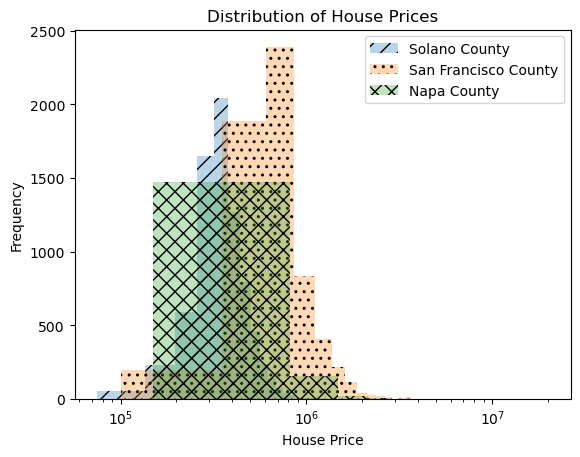

In [180]:
# Q6: Compare the distributions of house prices for Napa County, San Francisco County, and Solano County by overlaying their histograms

counties = ['Solano County', 'San Francisco County', 'Napa County']
filtered_county = sf_housings[sf_housings['county'].isin(counties)]

fig, ax = plt.subplots()

hatches = ['//', '..', 'xx']

for i, county in enumerate(counties):
    county_data = filtered_county[filtered_county['county'] == county]
    ax.hist(county_data['price'], bins=30, alpha=0.3, label=county, hatch=hatches[i])

ax.set_title('Distribution of House Prices')
ax.set_xlabel('House Price')
ax.set_ylabel('Frequency')
ax.legend()

# Using logarithmic scale on x-axis
ax.set_xscale('log', base=10)

plt.savefig('Q.6.jpg')
plt.show()


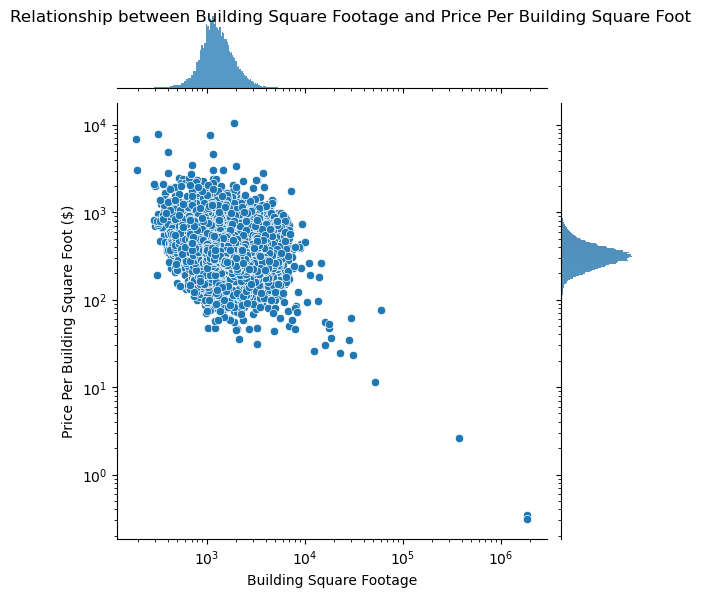

In [165]:
#Q8.How is the price per building square foot related to the building square footage? Bonus [1pt]: 
#Add histograms for the distributions of the price per building square foot and building square footage as marginal plots. 

import seaborn as sns

sf_housings.dropna(subset=['price','bsqft'], inplace=True)

#calculate price per building square foot
sf_housings['ppbsf']=sf_housings['price']/sf_housings['bsqft']
#plt.scatter(x='bsqft', y='ppbsf', data=sf_housings)
##to plot scatterplot with marginal histograms, we use seaborn library with function 'jointplot' 

sns.jointplot(x='bsqft', y='ppbsf', data=sf_housings, kind='scatter')#, marginal_kws=dict(bins=20, fill=True))
#marginal_kws=dict(bins=20, fill=True): This parameter allows customization of the marginal plots (histograms) along the x-axis and y-axis. The bins parameter sets the number of bins for the histograms, and fill=True fills the bars of the histograms with color.
plt.xscale('log')
plt.yscale('log')

plt.suptitle('Relationship between Building Square Footage and Price Per Building Square Foot')
plt.xlabel('Building Square Footage')
plt.ylabel('Price Per Building Square Foot ($)')
plt.savefig('Q.8.jpg')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

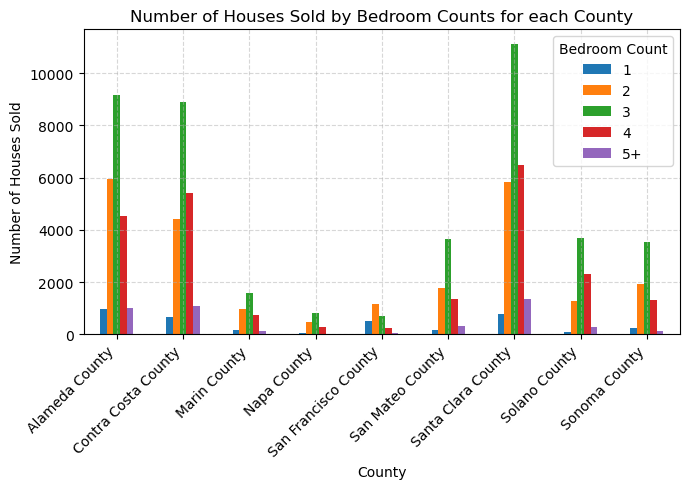

In [171]:
#9. (3pt) How many houses were sold by bedroom count for each county? Use the following categories for the number of bedrooms: 1, 2, 3, 4, 5+, unknown.
import pandas as pd

# the categories for number of bedrooms
bedroom_categories = {
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5+',
    pd.NA: 'unknown'  # pd.NA represents missing values (NaN)
}

# mapping the number of bedrooms to categories
sf_housings['br_category'] = sf_housings['br'].map(bedroom_categories)

# grouping by 'county' and 'br_category' and count the number of houses in each group using the function size() and unstack() function
#is used to pivot a level of the index labels. When applied to a DataFrame with a multi-level index, unstack() can move one of the levels of the index labels to become column labels, effectively reshaping the DataFrame.
houses_sold_by_bedrooms = sf_housings.groupby(['county', 'br_category']).size().unstack(fill_value=0)

# renaming the index to make it clearer
houses_sold_by_bedrooms.index.names = ['County']

houses_sold_by_bedrooms.plot(kind='bar', stacked=False, figsize=(7, 5))

plt.title('Number of Houses Sold by Bedroom Counts for each County')
plt.xlabel('County')
plt.ylabel('Number of Houses Sold')
plt.xticks(rotation=45, ha='right')  # rotating x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.5)



plt.legend(title='Bedroom Count')
plt.tight_layout()
plt.savefig('Q.9.png')
plt.show


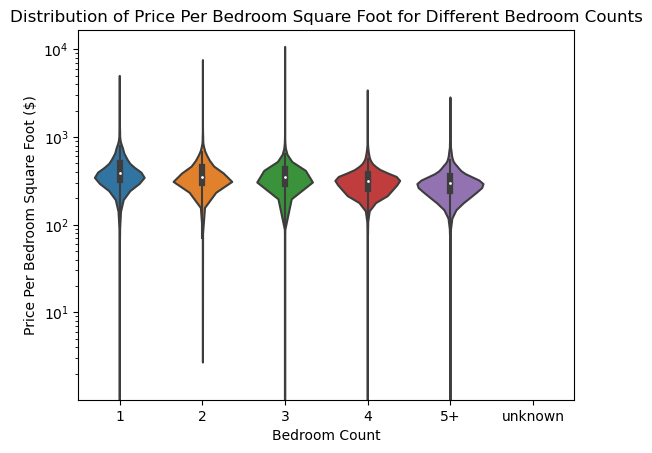

In [173]:
#10. Compare the distributions of the price per square foot for different bedroom counts. Use the following categories for the number of bedrooms: 1, 2, 3, 4, 5+, unknown. (All of the distributions should be visible in a single plot for easy comparison.) 

#to set order first
bedroom_order = ['1', '2', '3', '4', '5+', 'unknown']

sns.violinplot(x='br_category', y='ppbsf', data=sf_housings, order=bedroom_order)

plt.title('Distribution of Price Per Bedroom Square Foot for Different Bedroom Counts')
plt.xlabel('Bedroom Count')
plt.ylabel('Price Per Bedroom Square Foot ($)')
plt.yscale('log')

plt.savefig('Q10.png')
plt.show()



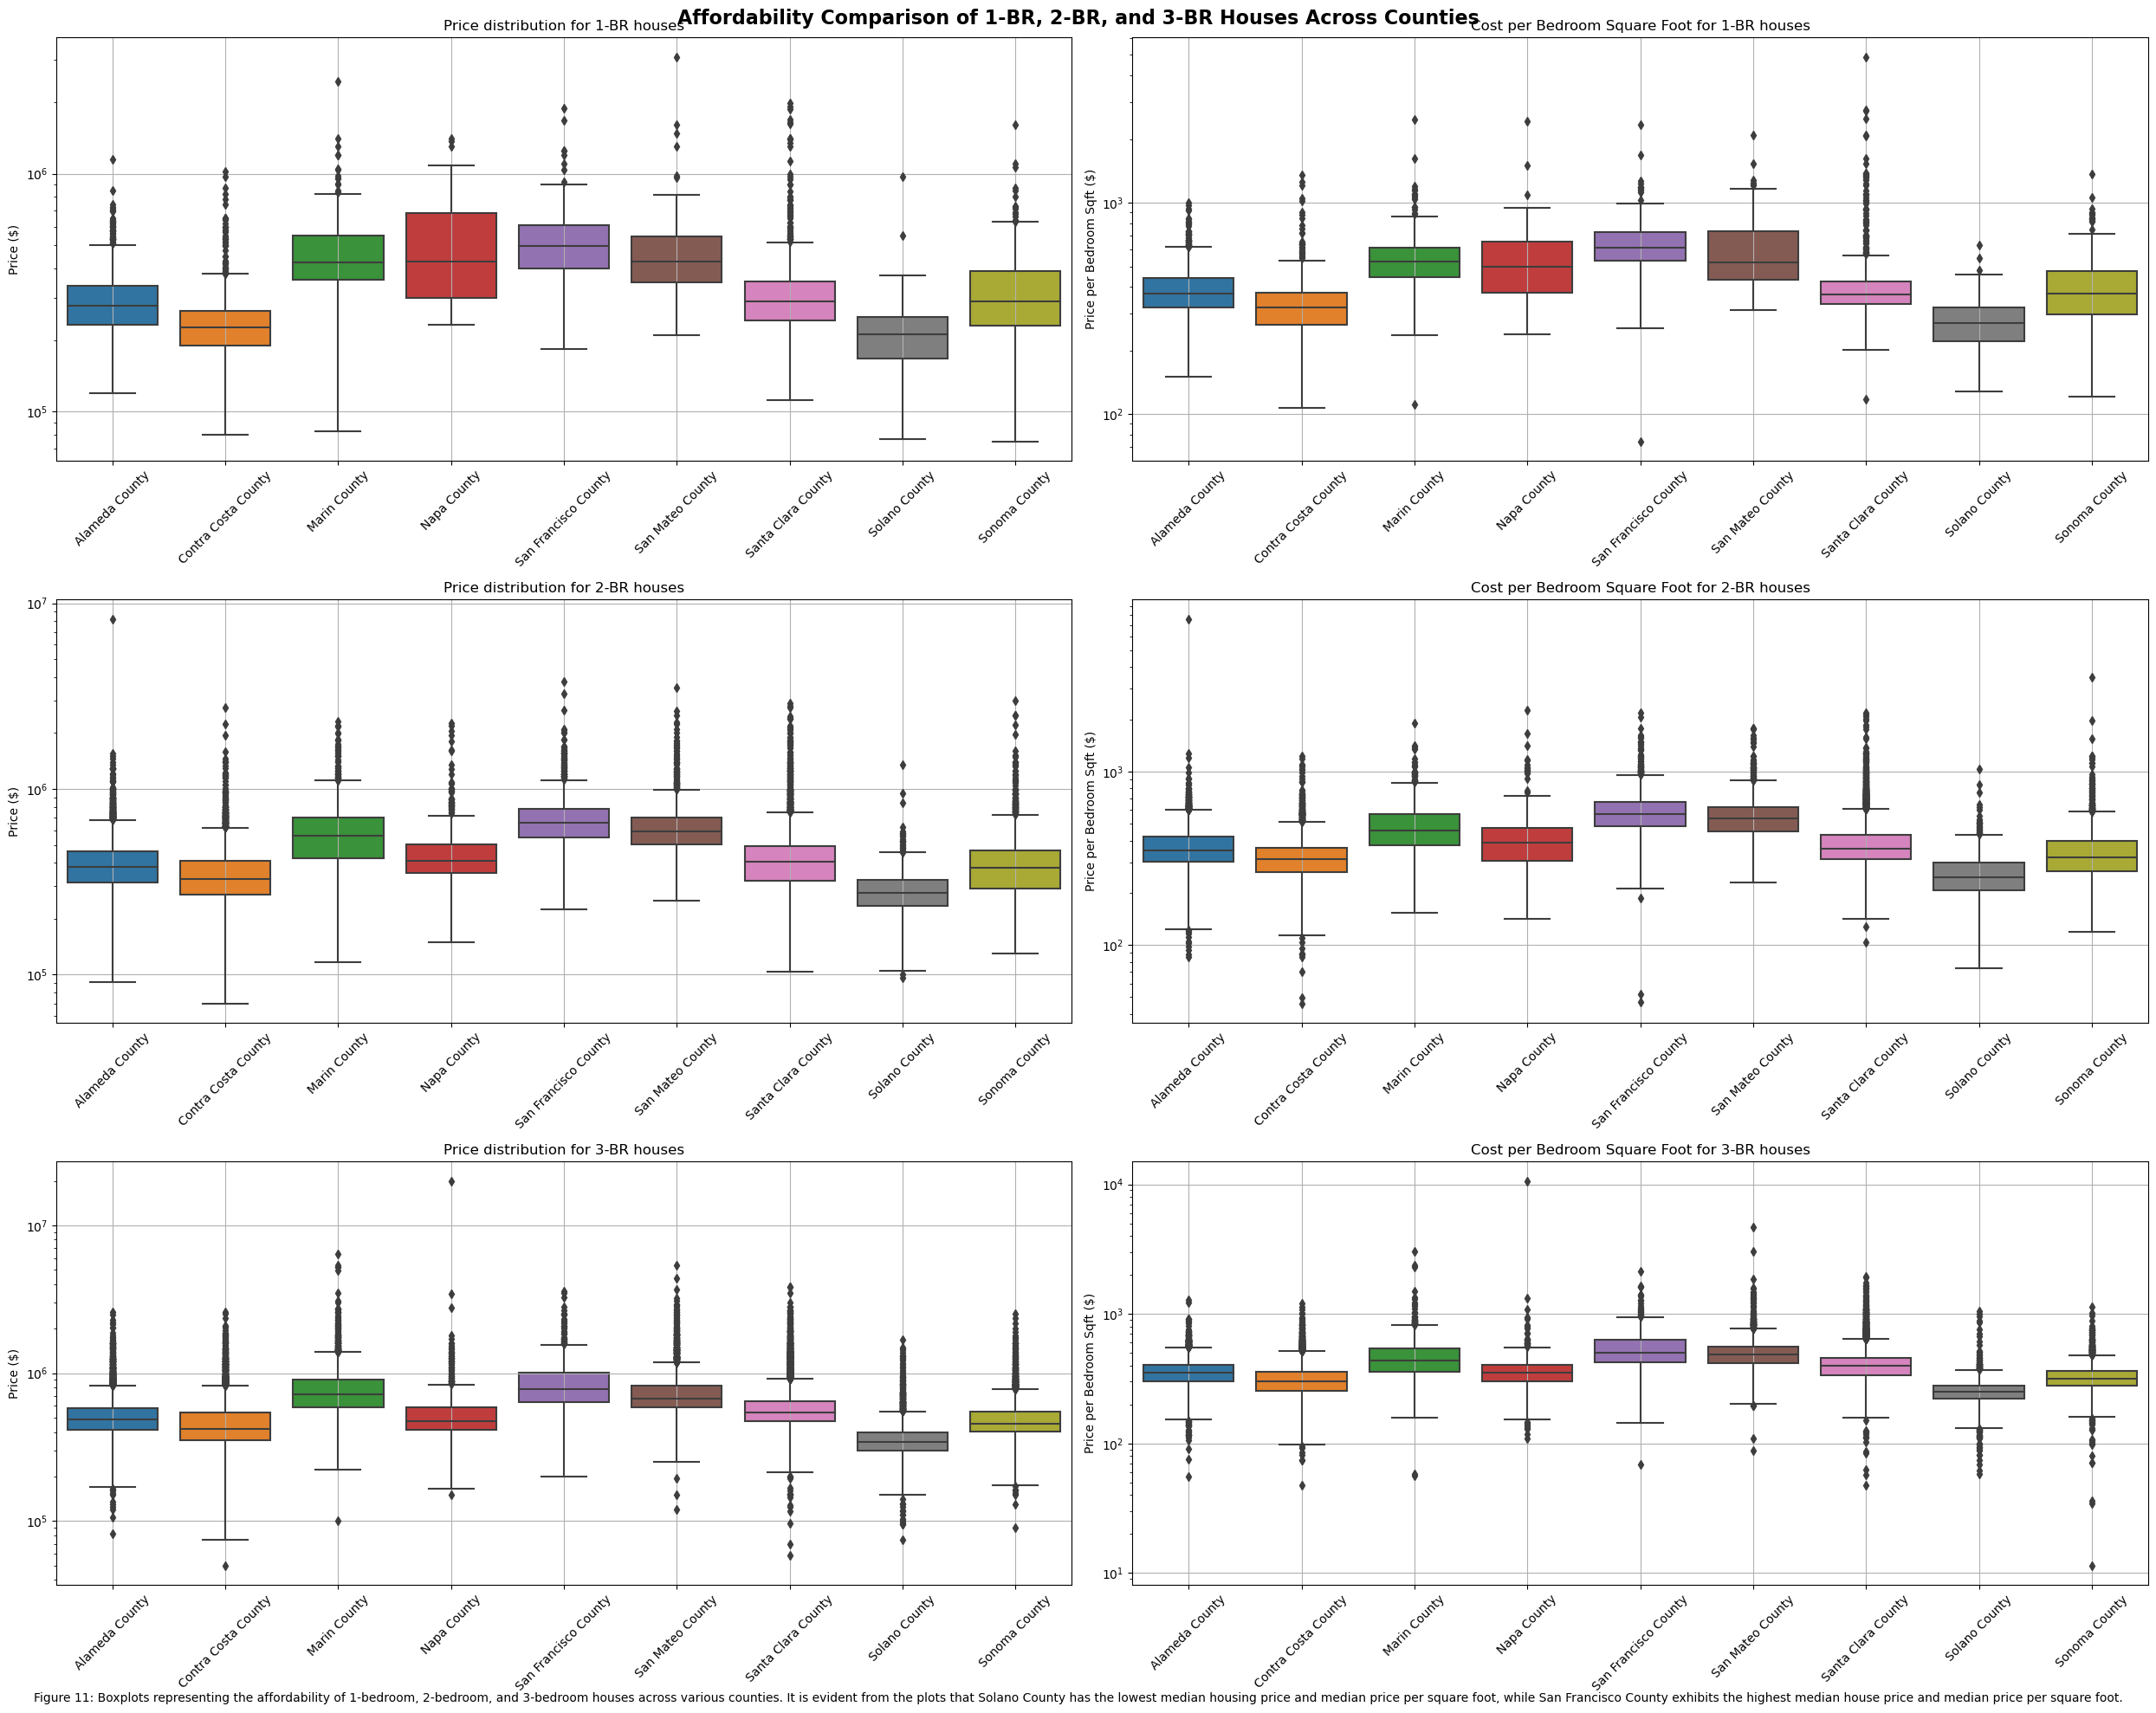

In [154]:
import seaborn as sns
fig, axs=plt.subplots(3, 2, figsize=(25,20))

#boxplot for price

sns.boxplot(data=sf_housings[sf_housings['br']==1], x='county', y='price', ax=axs[0,0])
axs[0, 0].set_title('Price distribution for 1-BR houses')
axs[0, 0].set_xlabel('')
axs[0, 0].set_ylabel('Price ($)')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].grid(True)
axs[0,0].set_yscale('log')


sns.boxplot(data=sf_housings[sf_housings['br']==1], x='county', y='ppbsf', ax=axs[0,1])
axs[0, 1].set_title('Cost per Bedroom Square Foot for 1-BR houses')
axs[0, 1].set_xlabel('')
axs[0, 1].set_ylabel('Price per Bedroom Sqft ($)')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].grid(True)
axs[0,1].set_yscale('log')

sns.boxplot(data=sf_housings[sf_housings['br']==2], x='county', y='price', ax=axs[1,0])
axs[1, 0].set_title('Price distribution for 2-BR houses')
axs[1, 0].set_xlabel('')
axs[1, 0].set_ylabel('Price ($)')
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].grid(True)
axs[1,0].set_yscale('log')

sns.boxplot(data=sf_housings[sf_housings['br']==2], x='county', y='ppbsf', ax=axs[1,1])
axs[1, 1].set_title('Cost per Bedroom Square Foot for 2-BR houses')
axs[1, 1].set_xlabel('')
axs[1, 1].set_ylabel('Price per Bedroom Sqft ($)')
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].grid(True)
axs[1,1].set_yscale('log')

sns.boxplot(data=sf_housings[sf_housings['br']==3], x='county', y='price', ax=axs[2,0])
axs[2, 0].set_title('Price distribution for 3-BR houses')
axs[2, 0].set_xlabel('')
axs[2, 0].set_ylabel('Price ($)')
axs[2, 0].tick_params(axis='x', rotation=45)
axs[2, 0].grid(True)
axs[2,0].set_yscale('log')


sns.boxplot(data=sf_housings[sf_housings['br']==3], x='county', y='ppbsf', ax=axs[2,1])
axs[2, 1].set_title('Cost per Bedroom Square Foot for 3-BR houses')
axs[2, 1].set_xlabel('')
axs[2, 1].set_ylabel('Price per Bedroom Sqft ($)')
axs[2, 1].tick_params(axis='x', rotation=45)
axs[2, 1].grid(True)
axs[2,1].set_yscale('log')

fig.suptitle('Affordability Comparison of 1-BR, 2-BR, and 3-BR Houses Across Counties', fontsize=16, fontweight='bold')

caption='Figure 11: Boxplots representing the affordability of 1-bedroom, 2-bedroom, and 3-bedroom houses across various counties. It is evident from the plots that Solano County has the lowest median housing price and median price per square foot, while San Francisco County exhibits the highest median house price and median price per square foot.'

fig.text(0.5, 0.001, caption, ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.savefig("Q11.jpg")
plt.show()